In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import requests
url = 'https://github.com/campusx-official/100-days-of-machine-learning/raw/main/day48-simple-linear-regression/placement.csv'
res = requests.get(url, allow_redirects=True)
with open('placement.csv','wb') as file:
    file.write(res.content)
placement = pd.read_csv('placement.csv')

In [13]:
placement

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'PACKAGE (in LPA)')

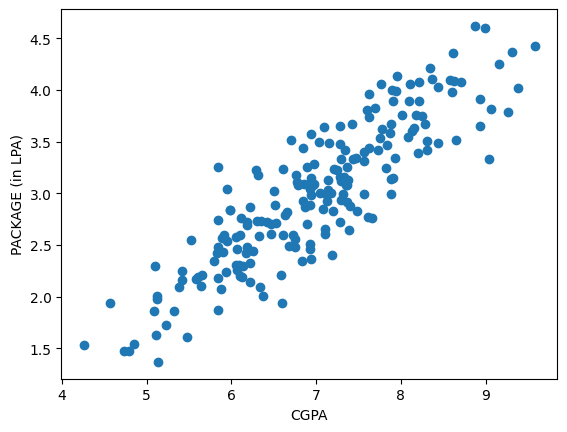

In [17]:
plt.scatter(placement["cgpa"],placement["package"])
plt.xlabel("CGPA")
plt.ylabel("PACKAGE (in LPA)")

In [19]:
# as you can see above the data is distributed in sort of linear so we need to run Linear regression on it.
# and make a model so that it predicts the package when an appropriate CPGA is given to it

In [22]:
X = placement.iloc[:,0:1]
Y = placement.iloc[:,-1]

In [23]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [24]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
# fit ka kam hai model ko train karna

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [31]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [33]:
# if you dont reshape it to (1,1) coz the data is in 2D and you are giving it 1D input 
# you need to write .values coz these are divided into two parts INDEX and VALUES and we need VALUES.

In [34]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [35]:
lr.predict(X_test.iloc[3].values.reshape(1,1))

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.57434935])

In [39]:
# just to see the linear regression line in the DATA 

Text(0, 0.5, 'PACKAGE (in LPA)')

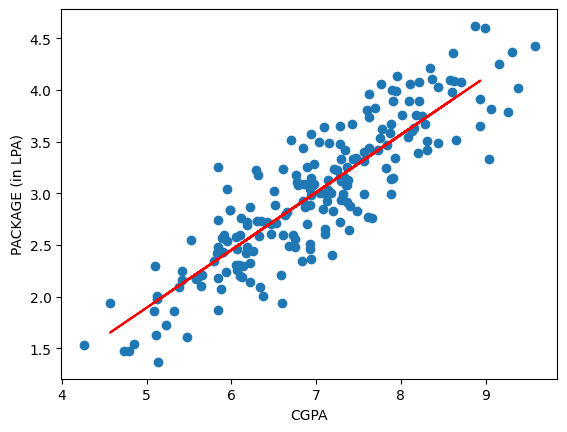

In [37]:
# Linear Regression line drawn on X-test data
plt.scatter(placement["cgpa"],placement["package"])
plt.plot(X_test,lr.predict(X_test),color = "red")
plt.xlabel("CGPA")
plt.ylabel("PACKAGE (in LPA)")

Text(0, 0.5, 'PACKAGE (in LPA)')

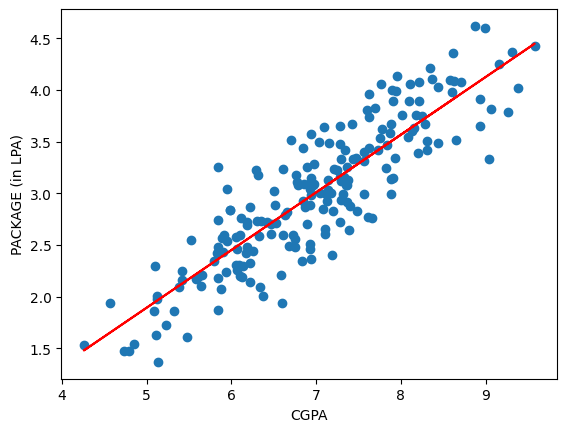

In [40]:
# Linear Regression line drawn on X-train data
plt.scatter(placement["cgpa"],placement["package"])
plt.plot(X_train,lr.predict(X_train),color = "red")
plt.xlabel("CGPA")
plt.ylabel("PACKAGE (in LPA)")

In [41]:
# when it plots best fit line it finds slope and y-intercept of the line 

In [43]:
slope = lr.coef_
slope

array([0.55795197])

In [44]:
y_intercept = lr.intercept_
y_intercept

-0.8961119222429144

In [45]:
# Y(predicted value) = Slope x  X(Value used for prediction) + Intercept

In [46]:
slope * 8.58 + y_intercept

array([3.89111601])

In [47]:
# behind the scenes the LinearRegression model is plotting the line and then finding the slope the intercept and using
# it in the formula listed in above comment

In [53]:
# there no limited value for prediction as you can see below

In [54]:
slope * 100 + y_intercept

array([54.89908542])

In [2]:
df = pd.read_csv("tvmarketing.csv")

In [3]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


Text(0, 0.5, "['Sales']")

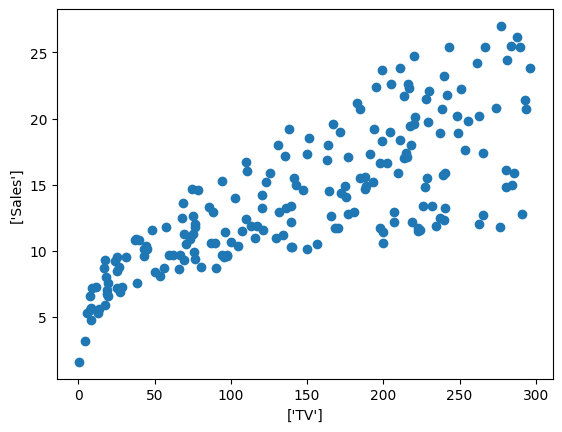

In [4]:
plt.scatter(df["TV"],df["Sales"])
plt.xlabel(["TV"])
plt.ylabel(["Sales"])

In [18]:
X = df.iloc[:,0:1]
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [19]:
Y = df.iloc[:,-1]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =2)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
X_test

,TV
112,175.7
29,70.6
182,56.2
199,232.1
193,166.8
85,193.2
10,66.1
54,262.7
115,75.1
35,290.7


In [27]:
y_test

112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
85     15.2
10      8.6
54     20.2
115    12.6
35     12.8
12      9.2
92     19.4
13      9.7
126     6.6
174    11.5
2       9.3
44      8.5
3      18.5
113    15.9
14     19.0
23     15.5
25     12.0
6      11.8
134    10.8
165    11.9
173    11.7
45     14.9
65      9.3
48     14.8
122    11.6
178    11.8
64     18.0
9      10.6
57     13.2
78      5.3
71     12.4
128    24.7
176    20.2
131    12.7
53     21.2
Name: Sales, dtype: float64

In [28]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.78344456])

In [29]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.51467999])

Text(0, 0.5, 'Sales')

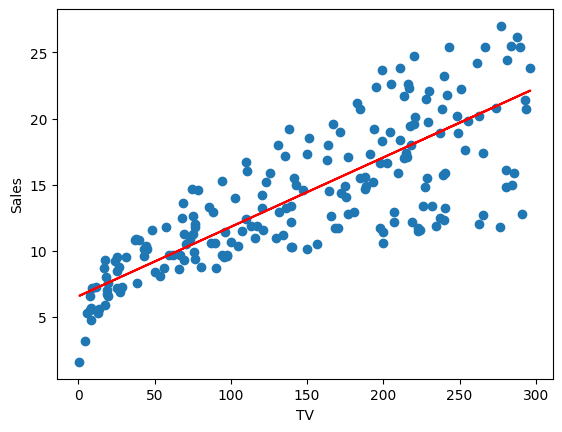

In [30]:
# Linear Regression line drawn on X-train data
plt.scatter(df["TV"],df["Sales"])
plt.plot(X_train,lr.predict(X_train),color = "red")
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

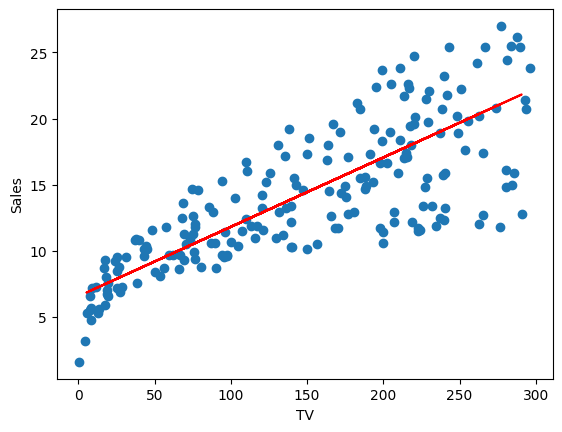

In [31]:
# Linear Regression line drawn on X-train data
plt.scatter(df["TV"],df["Sales"])
plt.plot(X_test,lr.predict(X_test),color = "red")
plt.xlabel("TV")
plt.ylabel("Sales")